In [2]:
import os,sys
sys.path.append('../')
import pickle
import torch
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from tmp_functions import *
from DJSCCv2 import *

tensor([0.5000, 0.5556, 0.6111, 0.6667, 0.7222, 0.7778, 0.8333, 0.8889, 0.9444,
        1.0000, 1.0556, 1.1111, 1.1667, 1.2222, 1.2778, 1.3333, 1.3889, 1.4444,
        1.5000, 1.5556, 1.6111, 1.6667, 1.7222, 1.7778, 1.8333, 1.8889, 1.9444,
        2.0000, 2.0556, 2.1111, 2.1667, 2.2222, 2.2778, 2.3333, 2.3889, 2.4444,
        2.5000, 2.5556, 2.6111, 2.6667, 2.7222, 2.7778, 2.8333, 2.8889, 2.9444,
        3.0000, 3.0556, 3.1111, 3.1667, 3.2222, 3.2778, 3.3333, 3.3889, 3.4444,
        3.5000, 3.5556, 3.6111, 3.6667, 3.7222, 3.7778, 3.8333, 3.8889, 3.9444,
        4.0000, 4.0556, 4.1111, 4.1667, 4.2222, 4.2778, 4.3333, 4.3889, 4.4444,
        4.5000, 4.5556, 4.6111, 4.6667, 4.7222, 4.7778, 4.8333, 4.8889, 4.9444,
        5.0000, 5.0556, 5.1111, 5.1667, 5.2222, 5.2778, 5.3333, 5.3889, 5.4444,
        5.5000, 5.5556, 5.6111, 5.6667, 5.7222, 5.7778, 5.8333, 5.8889, 5.9444,
        6.0000])
[-2.0380503276953714, -2.0466614354696175, -2.054422594190514, -2.061484358810024, -2.0679606088477653,

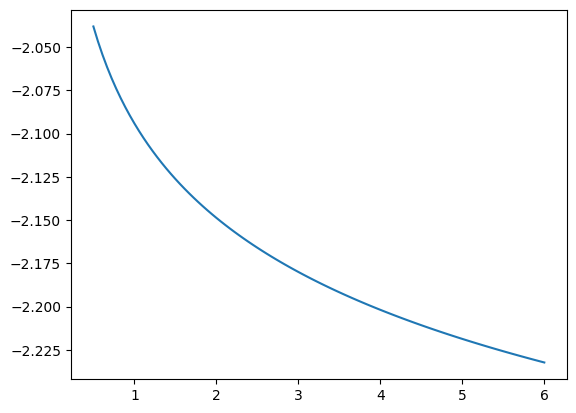

In [5]:
Nt = 2
U = 2
P_exp = torch.linspace(2,10,10)
P_sums = 10**P_exp
P_sums = torch.linspace(0.5,6,100)
H = torch.Tensor([[1,0.1],[0.3,1]])
p_noise = [0.3**2,0.15**2]

W = F.normalize(H@torch.inverse(H.T@H),dim=0)
W_dict={"ZF":W,
"OPT":torch.Tensor([[0.9976,-0.2448],[-0.0693,0.9696]]),}
mode = "ZF"
weight = [0.5,0.5]

snr_dbs = [2,5,7,10,12]
mses = [0.00535936,
0.001978624,
0.001232702,
0.000869419,
0.000792047
]
mses_log10 = torch.log10(torch.Tensor(mses))
f_linear = interp1d(snr_dbs,mses_log10,kind = 'quadratic',fill_value="extrapolate")
dos = []

for p_sum in P_sums:
    P = torch.ones(U,1)/U*p_sum
    # P = torch.Tensor([0.6846,0.2837])*p_sum
    _,sinr_db = sinr_downlink(W_dict,mode,P,H,p_noise)
    res = sum([f_linear(sinr_db[u])*weight[u] for u in range(U)])
    dos.append(res)

plt.plot(P_sums,dos)
print(P_sums)
print(dos)


In [21]:
import numpy as np
10*np.log10(1/10**(-2.025)),10*np.log10(1/10**(-3.063))

(20.25, 30.630000000000003)